In [2]:
# paired t-test

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

test for normality: ShapiroResult(statistic=0.9562923908233643, pvalue=0.7429129481315613)
do not reject the null


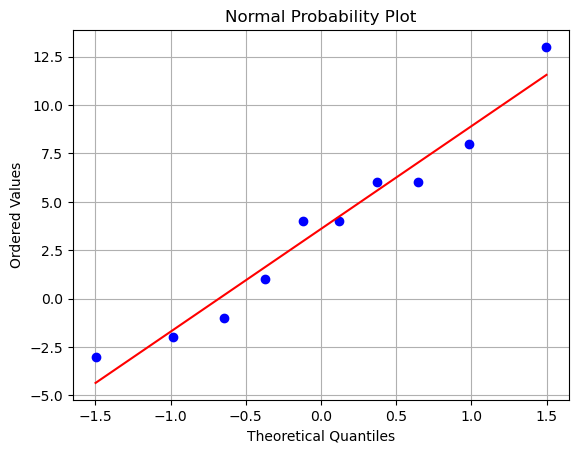

alpha: 0.05
sample size: 10
mean diff: 3.6
std of diff: 4.971027168615266
paired t-statistic: 2.290110110135922
DoF: 9
p-value: 0.047766050110303535
critical value: 2.262
p-value: 0.047766050110303535
ME: 3.555811558561561
CI: (0.04418844143843925, 7.155811558561561)


In [18]:
# Do the mean age of married men differ than married women
# sample size of 10 married couples
# the array provides the difference in ages

# Hypotheses:
# H0: μ1 = μ2 (the means are equal)
# H1: μ1 ≠ μ2 (the means are not equal, two-tailed test)

# Differences data
differences = np.array([6, -1, -3, 4, 6, -2, 1, 4, 13, 8])

## test for normality 

# test for normality
# Ho: data is normally distributued
# Ha: data is not normally distributed

shapiro_test = stats.shapiro(differences)
print(f'test for normality: {shapiro_test}')

if (round(shapiro_test[1],2)) < alpha:
    print("reject the null hypotheses")
else:
    print("do not reject the null")

fix, ax = plt.subplots()
stats.probplot(differences, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

# define the threshold
alpha = 0.05
print(f'alpha: {alpha}')

# Sample size
n = len(differences)
print(f'sample size: {n}')

# mean difference
mean_diff = np.mean(differences)
print(f'mean diff: {mean_diff}')

# Standard deviation of differences
std_diff = np.std(differences, ddof=1)
print(f'std of diff: {std_diff}')

# t-statistic 
t_statistic = mean_diff / (std_diff / np.sqrt(n))
print(f'paired t-statistic: {t_statistic}')

# Degrees of freedom
df = n - 1
print(f'DoF: {df}')

# p-value
p_value = stats.t.sf(np.abs(t_statistic), df) * 2  # two-tailed test
print(f'p-value: {p_value}')

# Determine critical t-value for 95% confidence level (two-tailed test)
t_critical = stats.t.ppf(1 - alpha/2, df)
t_critical = round(t_critical,3)
print(f'critical value: {t_critical}')

# p-value
p_value = stats.t.sf(np.abs(t_statistic), df) * 2  # two-tailed test
print(f'p-value: {p_value}')


# Confidence interval calculation
confidence_level = 0.95
margin_of_error = t_critical * (std_diff / np.sqrt(n))
print(f'ME: {margin_of_error}')

# Lower and upper bounds of the confidence interval
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)
print(f'CI: {confidence_interval}')